In [1]:
import pandas as pd

In [2]:
data_path = 'Data/douban_movies_rs.csv'

# 数据量过大，我们使用一部分数据进行实验
ratings_explicit = pd.read_csv(data_path,nrows=10000)
ratings_explicit.head(5)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4
1,1,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,大奇特(Grinch),2018-06-28,3,传记片能做到半真半假的真实，就成功一半了，然后就是走进人物的内心世界。这部影片做到了纪录片般...,66%31%3%,4
2,2,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,西楼尘,2018-07-01,3,意大利房东记得他的嚣张，岔开大腿抽着烟说，我的计划是成为优雅的老女人。总念错名字的劳拉记得她...,66%31%3%,2
3,3,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,张晚禾,2018-06-28,3,意大利电影周开幕片,66%31%3%,0
4,4,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,汪金卫,2018-06-29,3,【中国电影资料馆展映】歌星Nico的最后三年，青春不再，人气不再，衰老暴躁，在漂泊不定的巡回...,66%31%3%,1


数据属性简介。

|  属性  |                  描述    |
|:------:|:--------------------------------------:|
| `ID` | 自增字段 |
| `Movie_Name` | 电影名 |
| `Movie_Score` | 电影总体评分 |
| `Review_Count`  | 评论量统计 |
| `Movie_Star_Distribution` | 电影的评分分布 |
| `Collect_Date` |  数据收集时间 |
| `Username` | 用户昵称 |
| `Post_Date` | 评论发表日期 |
| `Score` | 用户评分 |
| `User_Comment` | 用户评论 |
| `User_Comment_Distribution` | 用户评分情况 |
| `Comment_Like_Count` | 用户评论点赞量 |

#### 数据 EDA 

按照电影名个用户名字进行去重，并保留首次出现的数据。

In [3]:
ratings_explicit.drop_duplicates(
    subset=['Movie_Name', 'Username'], keep='first', inplace=True)

查看数据统计描述。

In [4]:
ratings_explicit.describe()

,ID,Movie_Score,Review_Count,Score,Comment_Like_Count
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5066.296300,7.41456,6630.360700,3.620100,0.385500
std,2921.169112,0.64014,7458.354939,0.954079,5.563954
min,0.000000,5.80000,287.000000,1.000000,0.000000
25%,2529.750000,7.00000,2039.000000,3.000000,0.000000
50%,5070.500000,7.60000,3581.000000,4.000000,0.000000
75%,7591.250000,7.90000,12803.000000,4.000000,0.000000
max,10120.000000,9.30000,22640.000000,5.000000,460.000000


查看数据结构。

In [5]:
ratings_explicit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
ID                           10000 non-null int64
Movie_Name                   10000 non-null object
Movie_Score                  10000 non-null float64
Review_Count                 10000 non-null int64
Movie_Star_Distribution      10000 non-null object
Collect_Date                 10000 non-null object
Username                     9999 non-null object
Post_Date                    10000 non-null object
Score                        10000 non-null int64
User_Comment                 10000 non-null object
User_Comment_Distribution    10000 non-null object
Comment_Like_Count           10000 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 1015.6+ KB


查看总体用户数量。

In [6]:
len(ratings_explicit.Username.unique())

9005

查看总体电影数量。

In [7]:
len(ratings_explicit.Movie_Name.unique())

26

统计观看电影最多的 topk 的用户。

In [8]:
topk = 10
ratings_explicit['Username'].value_counts()[:topk]

[已注销]          21
已注销            10
麦克阿瑟            8
圣墟              7
M & R           6
米粒              6
mark            5
树               5
BobMing         5
Nightingale     5
Name: Username, dtype: int64

查看前 topk 个用户的观影分布。

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

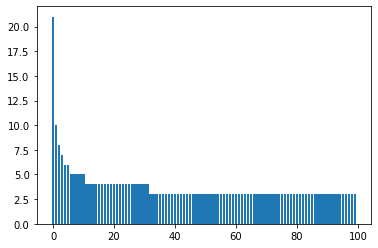

In [10]:
topk = 100
number_count = ratings_explicit['Username'].value_counts()
plt.bar(range(len(number_count[:topk])), number_count[:topk])
plt.show()

统计观看人数 topk 的电影。

In [11]:
topk = 10
ratings_explicit['Movie_Name'].value_counts()[:topk]

不惧风暴 Into the Storm                        1483
42号传奇 42                                   1038
不可告人 Ne le dis à personne                   945
一轮明月                                        798
不朽真情 Immortal Beloved                       663
一年级生 The First Grader                       609
万夫莫敌 Invincible                             506
三岛由纪夫传 Mishima: A Life in Four Chapters     479
一曲难忘 A Song to Remember                     469
不要忘记哥哥 にぃにのことを忘れないで                         374
Name: Movie_Name, dtype: int64

#### 数据可视化

用户对电影的打分情况。

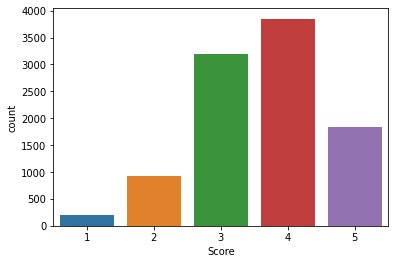

In [12]:
sns.countplot(data=ratings_explicit, x='Score')
plt.show()

提取用户评价时间和统计信息。

In [13]:
post_time, post_count = [], []

for i in ratings_explicit['Post_Date'].groupby(
        ratings_explicit['Post_Date']).count().items():
    # 取出时间标签
    post_time.append(i[0])
    # 取出计数信息
    post_count.append(i[1])

##### 用户评论时间序列

使用折线图对用户评论时间进行可视化。

In [14]:
!pip install pyecharts==1.6.2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [15]:
from pyecharts.charts import Line
from pyecharts import options as opts

# 加载图的配置，长宽的参数设置
line = Line(init_opts=opts.InitOpts(width='660px', height='350px'))

# 设置横坐标为时间
line.add_xaxis(post_time)

# 设置纵坐标为用户评论条数
line.add_yaxis("", post_count)

# 设置标题
line.set_global_opts(title_opts=opts.TitleOpts(title='用户评论时间序列图'))

# 设置显示统计量
line.set_series_opts(label_opts=opts.LabelOpts(is_show=True), )
line.render_notebook()

##### 用户评论关键词云

In [16]:
from jieba import analyse

# 默认使用前 20 个关键词


def get_key_words(comment, topK=20):
    return analyse.textrank(comment, topK, withWeight=False, allowPOS=('n'))

In [17]:
# 使用测试样例进行测试。
comment = '电影院环境不错'
get_key_words(comment)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.826 seconds.
Prefix dict has been built successfully.


['电影院', '环境']

提取影评中的 topK 关键词，数据量有些大，请耐心等待。

In [18]:
from tqdm.notebook import tqdm

keys_words_list = []
for comment in tqdm(ratings_explicit['User_Comment']):
    keys_words_list += get_key_words(comment)

In [19]:
# 加载词频统计模块
from sklearn.feature_extraction.text import CountVectorizer

# 设定 topn 的高频词语阈值，可以根据需要进行改变大小
topn = 500

# 加载统计模块
count_extract = CountVectorizer(max_features=topn)

# 开始对语料进行统计
count_extract.fit_transform(keys_words_list)

# 输入数据中的每一个词为（word，value）这样的元祖形式，然后将所有的词放入一个list中
comment_count_pair = [(k, int(v))
                      for k, v in count_extract.vocabulary_.items()]

In [20]:
# 加载词云模块
from pyecharts.charts import WordCloud

comment_wordcloud = WordCloud()

# word_size_range 表示词语大小范围，可以根据需要改变
comment_wordcloud.add(series_name="",
                      data_pair=comment_count_pair,
                      word_size_range=[5, 100])

# 设置词云的全局配置
comment_wordcloud.set_global_opts(
    title_opts=opts.TitleOpts(
        title="用户评论关键词云分析",
        # 设置标题文字大小
        title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    # 显示词云中的词频数字
    tooltip_opts=opts.TooltipOpts(is_show=True),)

# 直接在 notebook 中显示词云
comment_wordcloud.render_notebook()

根据用户评论对电影进行标签化。

In [21]:
ratings_explicit.head(1)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4


In [22]:
movie_list = ratings_explicit['Movie_Name'].unique()
movie_list[0]

'1988年的妮可 Nico, 1988'

批量从用户评论中提取电影关键词。

In [23]:
movie_map = dict()
for movie_name in tqdm(movie_list):
    comment_text = ratings_explicit[ratings_explicit['Movie_Name']==movie_name]['User_Comment'].values
    # 构建电影关键词标签
    movie_map[movie_name] = get_key_words(str(comment_text))

为电影打上用户评价标签。

In [24]:
ratings_explicit['Movie_Tags'] = ratings_explicit['Movie_Name'].apply(lambda x : movie_map[x])
ratings_explicit.head(1)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count,Movie_Tags
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4,"[音乐, 电影, 儿子, 丝绒, 人物, 传记, 传记片, 歌声, 巅峰, 人生, 经历, ..."


对处理好的数据进行存储。

In [25]:
ratings_explicit.to_csv('Data/New_Movie_RS.csv',index=False)